# <font color  = 'Red'><u> Machine learning Model Building CAC 
# Author : Thomaskutty_20122011 </center>
   
       
       
## <font color = "#00cc99"> <u> Solution Path and Contents
    
       
  * Importing Libraries 
  * Creating the base line model 
  * Imputing null value using random sample imputation 

  * Trying Random Forest on the Imputed dataset 
  * Trying Gradient Boosting Regressor on the Imputed dataset 
  * Trying standardisation ( using sklearn standardscalar) 
  * Adding more feartures and applying randomforest 
  * Adding more features and applied gradient boosting regressor 
  -----------------------------------------------------
   

# <font color  = 'darkblue'>Modelling Report 

### Introduction
In this work I created a regression model for the target variable y. The major issue i faced with this work is that the headres were masked. The data set contains 100000 rows and 305 columns in total. 

### Processing 
First i created a base line model using linear regression , i have shared the model summary table above. It shows not so good accuracy.( In this model i removed the  null value columns ). So i started doing the preprocessing steps. 

In the data processing, i used simple random inputing. I have also tried the knn imputer and iterative imputer but they didn't show much improvement in the performance. So i kept the random imputation tehchnique. The major advantage of random imputation is that it keeps the distributio of the feature. Then i tried to build some advanced regression algorithms like Randomforestregressor and GradientBoosting regressor. it shows some improvement in the accuracy and overall performance. 

Since some of the feature has got very much different scale, i tried minmax scaling and standard scaling. But unfortunately the model was performed very poorly due to the outliers ( i think). 

Finally i tried to include more featues into the model and again applied randomforest on it. It showed good performance. 


### Tools and libraries used  in this project 
    * sklearn libraries ( random forest and gradient boosting) 
    * visual studio code for debugging 
    * jupyter notebook - for the final presentation. 
    
 ============================================================================================================

#   <font color = "#00cc99"> Model Summary in a table

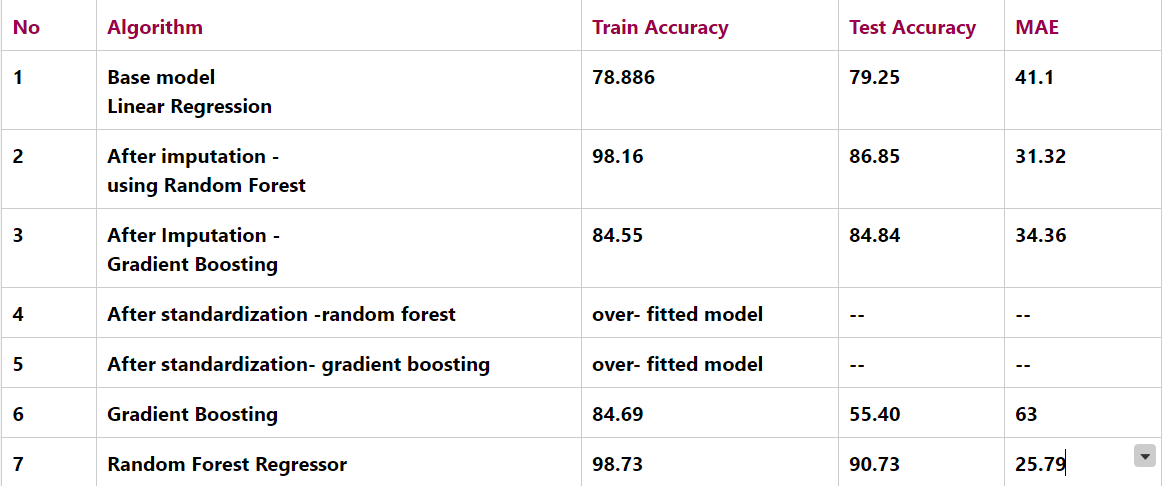

In [221]:
from IPython.display import Image
Image(filename='capture.png')

## <font color = '#3366cc'> Importing libraries 

In [213]:
# importing libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import copy 


# importing models 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# importing modal evaluation metrics 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


# importing model imputation libraries 
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# setting the display limits 
pd.set_option('display.max_columns', 500)

## <font color = '#3366cc'> Building the Base Model 

In [190]:
# loading the dataset 
df = pd.read_csv(r'C:\Users\ASUS\Documents\Gitrepo\Machine-Learning-with-Python\data\cac_df.csv')
print('Base Model  - measurements ')
print('===============================================')
# getting the column names in X_train ( which have high number of missing values)

miss_cols = list(df.isna().sum().nlargest(41).index)

# Now removing the those columns which contains high amount of missing values 
df.drop(miss_cols, inplace = True, axis = 1)



# splitting the data into train and test using sklearn train test split
X, y = (df.drop('y',axis = 1), df.y )
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)


# building the model 
base_model = LinearRegression()
base_model.fit(X_train,y_train) 

# model accuracy 
print('model train accuracy = ', base_model.score(X_train,y_train) )


# finding the mean absolute error on train 
y_pred = base_model.predict(X_train)
print('mean absolute error on train = ',mean_absolute_error(y_train, y_pred))
print('root mean squared error on test  = ', mean_squared_error(y_train,y_pred, squared = False))

#### on test data 

base_model.fit(X_test,y_test) 
base_model.score(X_test,y_test)
print('model test accuracy = ' , base_model.score(X_test,y_test) )


y_preds = base_model.predict(X_test)
print('mean absolute error on test = ',mean_absolute_error(y_test, y_preds))
print('root mean squared error on test = ', mean_squared_error(y_test,y_preds,squared = False))

Base Model  - measurements 
model train accuracy =  0.7886700904233475
mean absolute error on train =  41.864778927278024
root mean squared error on test  =  54.44315338381246
model test accuracy =  0.7925089913447
mean absolute error on test =  41.64323831521755
root mean squared error on test =  53.99284061099403


## <font color = '#3366cc'> Preprocessing the data to acheive good models 

In [191]:
# splitting the data into train and test using sklearn train test split
X, y = (df.drop('y',axis = 1), df.y )
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 46)

In [192]:
train_df = pd.DataFrame(X_train)
train_df['y'] = y_train

test_df = pd.DataFrame(X_test)
test_df['y'] = y_test

##  <font color = '#3366cc'> Imputing the null value using random sample imputation 

In [193]:
def impute_nan(df,var):
    df[var+"random"]=df[var]
    random_sample=df[var].dropna().sample(df[var].isnull().sum(),random_state=25,replace = True)
    random_sample.index=df[df[var].isna()].index
    df.loc[df[var].isnull(),var+"random"]=random_sample 

    
col_names = train_df.columns


for i in train_df.columns:
    impute_nan(train_df,i)
    
    
train_df.drop(col_names,axis = 1, inplace = True)

train_df.columns = col_names

cor  = train_df.corr()
cor_features = list(cor['y'].nlargest(100).index)


train_df = train_df[cor_features]
test_df = test_df[cor_features].dropna()




X_train = train_df.drop('y',axis = 1)
y_train = train_df.y

X_test = test_df.drop('y',axis = 1)
y_test = test_df.y

## <font color = '#3366cc'>Trying different models 

## <font color = '#3366cc'> Model 2: RandomForestRegressor

In [194]:
# model building 
model1 = RandomForestRegressor()
model1.fit(X_train,y_train)


print('model training accuracy: ', model1.score(X_train,y_train)) 
print('model testing accuracy:  ' ,model1.score(X_test,y_test))

y_preds = model1.predict(X_test)
print('mean absolute error on test = ',mean_absolute_error(y_test, y_preds))
print('root mean squared error on test = ', me<font color = '#3366cc'>an_squared_error(y_test,y_preds,squared = False))

model training accuracy:  0.981602694770069
model testing accuracy:   0.8685346634099173
mean absolute error on test =  31.321668666666667
root mean squared error on test =  42.8856412382202


##  <font color = '#3366cc'> Model 3: GradientBoosingRegressor()

In [195]:
model2 = GradientBoostingRegressor()
model2.fit(X_train,y_train)
print('model training accuracy: ', model2.score(X_train,y_train)) 
model2.fit(X_test,y_test)
print('model testing accuracy:  ', model2.score(X_test,y_test))


y_preds = model2.predict(X_test)
print('mean absolute error on test = ',mean_absolute_error(y_test, y_preds))
print('root mean squared error on test = ', mean_squared_error(y_test,y_preds,squared = False))

model training accuracy:  0.8455013121574528
model testing accuracy:   0.8484170174987755
mean absolute error on test =  34.36277927838951
root mean squared error on test =  46.05019814790783


## <font color = '#3366cc'> Lets standardise the features using minmax scalar and standard scalar 

## <font color = '#3366cc'> Applying the standard scalar in x train

In [196]:
scalar = StandardScaler()
scalar.fit(X_train)
new_x_train  = pd.DataFrame(scalar.transform(X_train),columns = X_train.columns)

## <font color = '#3366cc'> Model 4

In [197]:
# model building 
model4 = RandomForestRegressor()
model4.fit(new_x_train,y_train)


print('model training accuracy: ', model4.score(new_x_train,y_train)) 
print('model testing accuracy:  ' ,model4.score(X_test,y_test))

y_preds = model4.predict(X_test)
print('mean absolute error on test = ',mean_absolute_error(y_test, y_preds))
print('root mean squared error on test = ', mean_squared_error(y_test,y_preds,squared = False))

model training accuracy:  0.9816421794773773
model testing accuracy:   0.09701300812340163
mean absolute error on test =  95.82624566666667
root mean squared error on test =  112.395008978765


## <font color = '#3366cc'> Model 5

In [199]:
# model building 
model5 = GradientBoostingRegressor()
model5.fit(new_x_train,y_train)


print('model training accuracy: ', model5.score(new_x_train,y_train)) 
print('model testing accuracy:  ' ,model5.score(X_test,y_test))

y_preds = model5.predict(X_test)
print('mean absolute error on test = ',mean_absolute_error(y_test, y_preds))
print('root mean squared error on test = ', mean_squared_error(y_test,y_preds,squared = False))

model training accuracy:  0.8455013121574528
model testing accuracy:   0.09523227039410231
mean absolute error on test =  96.14424353491124
root mean squared error on test =  112.50577882231164


In [202]:
# model building 
model7 = GradientBoostingRegressor()
model7.fit(new_x_train,y_train)


print('model training accuracy: ', model7.score(new_x_train,y_train)) 
print('model testing accuracy:  ' ,model7.score(X_test,y_test))

y_preds = model7.predict(X_test)
print('mean absolute error on test = ',mean_absolute_error(y_test, y_preds))
print('root mean squared error on test = ', mean_squared_error(y_test,y_preds,squared = False))

model training accuracy:  0.8469332822519846
model testing accuracy:   0.5540767165477611
mean absolute error on test =  63.98634901094352
root mean squared error on test =  78.98349621357424


#  <font color = '#3366cc'> Model 8 Final Model 

In [214]:
# loading the dataset 
df = pd.read_csv(r'C:\Users\ASUS\Documents\Gitrepo\Machine-Learning-with-Python\data\cac_df.csv')
print('Final  Model  - measurements ')
print('===============================================')
# getting the column names in X_train ( which have high number of missing values)

miss_cols = list(df.isna().sum().nlargest(41).index)

# Now removing the those columns which contains high amount of missing values 
df.drop(miss_cols, inplace = True, axis = 1)




# splitting the data into train and test using sklearn train test split
X, y = (df.drop('y',axis = 1), df.y )
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4, random_state = 39)

features = list(X_train.columns)
model_features = features[0:150]

X_train = X_train[model_features]

# building the model 
final_model = RandomForestRegressor()
final_model.fit(X_train,y_train) 

# model accuracy 
print('model train accuracy = ', final_model.score(X_train,y_train) )
features = list(X_train.columns)

# finding the mean absolute error on train 
y_pred = final_model.predict(X_train)
print('mean absolute error on train = ',mean_absolute_error(y_train, y_pred))
print('root mean squared error on test  = ', mean_squared_error(y_train,y_pred, squared = False))


#### on test data 
X_test = X_test[model_features]


print('model test accuracy = ' , final_model.score(X_test,y_test) )


y_preds = final_model.predict(X_test)
print('mean absolute error on test = ',mean_absolute_error(y_test, y_preds))
print('root mean squared error on test = ', mean_squared_error(y_test,y_preds,squared = False))

Final  Model  - measurements 
model train accuracy =  0.9873354507200232
mean absolute error on train =  9.514874666666666
root mean squared error on test  =  13.33770734484254
model test accuracy =  0.9073551010740164
mean absolute error on test =  25.7927645
root mean squared error on test =  36.03056236065432
